In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader
from my_snn.utils import train, training_plots
import torch
device = "cuda:0"

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

In [3]:
for images, labels in train_loader:
    break
print(images.shape)
print(labels.shape)

torch.Size([128, 50, 2])
torch.Size([128])


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


In [4]:
def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=128, bias=False)
  (f1_o): Linear(in_features=128, out_features=1, bias=False)
)

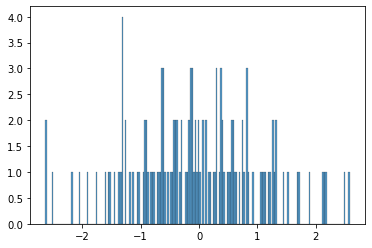

In [53]:
hidden = (128, 1, 'f')
snn = RSNN_d_i('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(50,1), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='prediction', batch_size=batch_size, device=device)
#snn = RSNN_2l('custom_2_1_{}'.format(batch_size), num_hidden=10, thresh=0.1, tau_m='adp', win=time_window, surr='fs',  loss_fn ='prediction', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

In [54]:
train(snn, data, 1e-3, 500, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)

RSNN_d_i(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=100, out_features=128, bias=False)
  (f1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 12928
Total mult-adds (M): 0.6464
training custom_2_1_12850_RSNN_d_i_1l128_50d1.t7 for 500 epochs...
Epoch [1/500]
Step [1/1], Loss: 0.66590
Time elasped: 0.12302899360656738
Epoch [2/500]


C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


Step [1/1], Loss: 0.36603
Time elasped: 0.12399840354919434
Epoch [3/500]
Step [1/1], Loss: 0.25700
Time elasped: 0.1230020523071289
Epoch [4/500]
Step [1/1], Loss: 0.29228
Time elasped: 0.12399721145629883
Epoch [5/500]
Step [1/1], Loss: 0.20952
Time elasped: 0.12288284301757812
Test set accuracy: 5.46875% 
--------------------------
Epoch [6/500]
Step [1/1], Loss: 0.15879
Time elasped: 0.12202954292297363
Epoch [7/500]
Step [1/1], Loss: 0.18479
Time elasped: 0.12397050857543945
Epoch [8/500]
Step [1/1], Loss: 0.20630
Time elasped: 0.12599921226501465
Epoch [9/500]
Step [1/1], Loss: 0.24393
Time elasped: 0.1250004768371582
Epoch [10/500]
Step [1/1], Loss: 0.28483
Time elasped: 0.12400293350219727
Test set accuracy: 7.03125% 
--------------------------
Epoch [11/500]
Step [1/1], Loss: 0.26176
Time elasped: 0.12900328636169434
Epoch [12/500]
Step [1/1], Loss: 0.26078
Time elasped: 0.1399996280670166
Epoch [13/500]
Step [1/1], Loss: 0.30018
Time elasped: 0.12299728393554688
Epoch [14/500

KeyboardInterrupt: 

No handles with labels found to put in legend.


(0.0, 1.0)

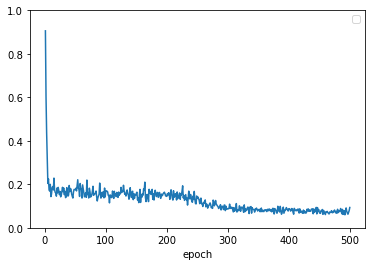

In [39]:
ax = snn.plot_per_epoch(snn.train_loss)
ax.set_ylim(0,1)

<AxesSubplot:>

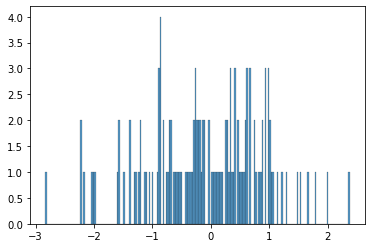

In [40]:
snn.plot(snn.tau_m_1)

In [41]:
#for images, labels in test_loader:
for images, labels in train_loader:
    a=0
    break

C:\Users\saucedo\Python\SRNN_tests\my_snn\custom_dataloader.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(image[idxa,0]+image[idxb,0])


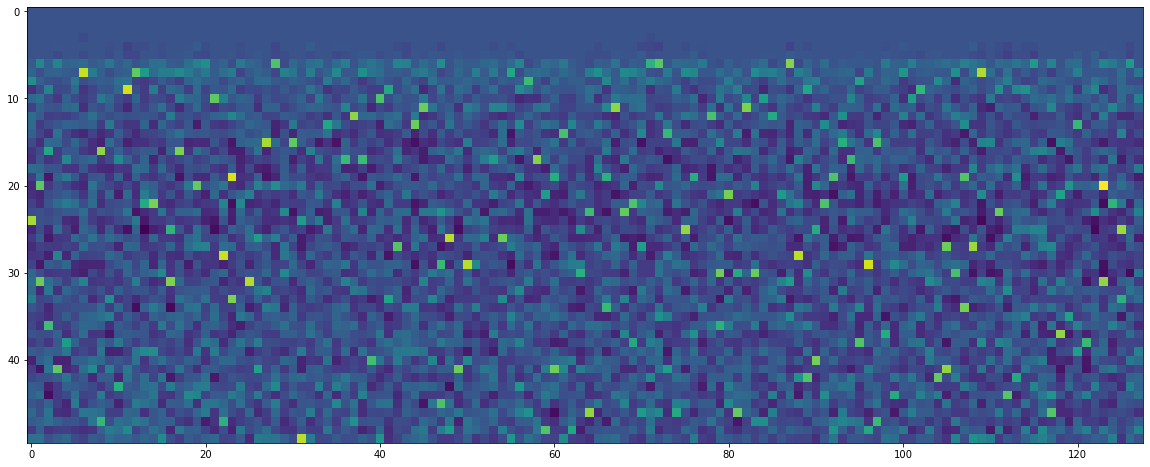

In [42]:
pred, ref = snn.propagate(images.to(device), labels.to(device))
import matplotlib.pyplot as plt
if hasattr(snn, 'mem_state'):
    plt.figure(figsize=(20,10))
    plt.imshow(snn.mem_state['output'][:,:,0].detach().cpu().numpy())
elif hasattr(snn, 'snn_state'):
    plt.figure(figsize=(10,10))
    plt.imshow(snn.snn_state['o_mem'][:,:,0].detach().cpu().numpy())

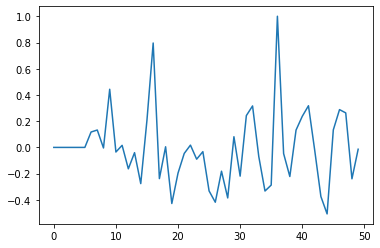

In [43]:
#plt.plot(snn.snn_state['o_mem'][:,2,0].detach().cpu().numpy())
plt.plot(snn.mem_state['output'][:,2,0].detach().cpu().numpy())

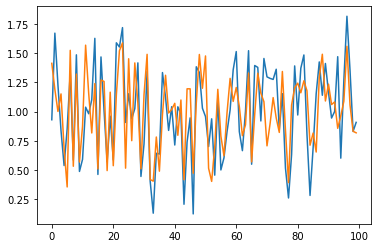

In [44]:
plt.plot(ref[:100].detach().cpu().numpy())
plt.plot(pred[:100].detach().cpu().numpy())

In [18]:
snn.plot_delays('matrix')

RuntimeError: shape '[1, 128, 50]' is invalid for input of size 128

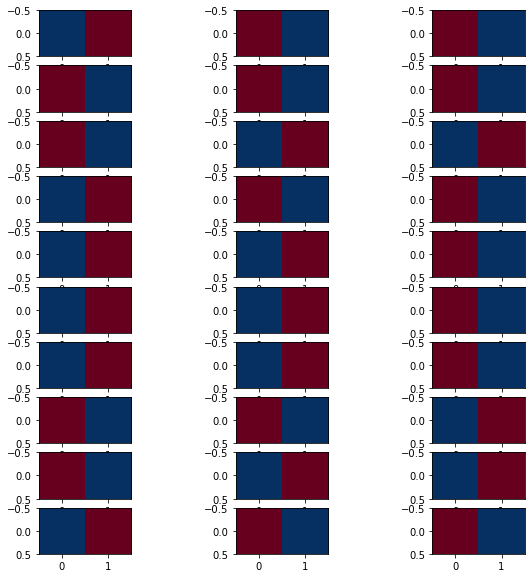

In [19]:
plt.figure(figsize=(10,10))
snn.plot_per_neuron_delays(snn.f0_i)

<Figure size 720x720 with 0 Axes>

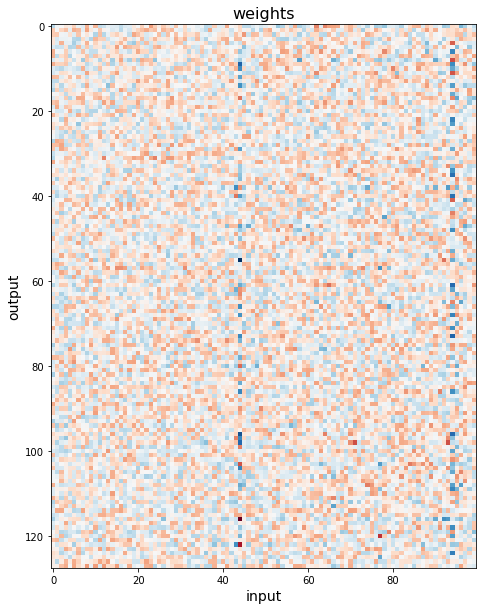

In [45]:
plt.figure(figsize=(10,10))
f = snn.plot(snn.f0_i, mode='matrix')

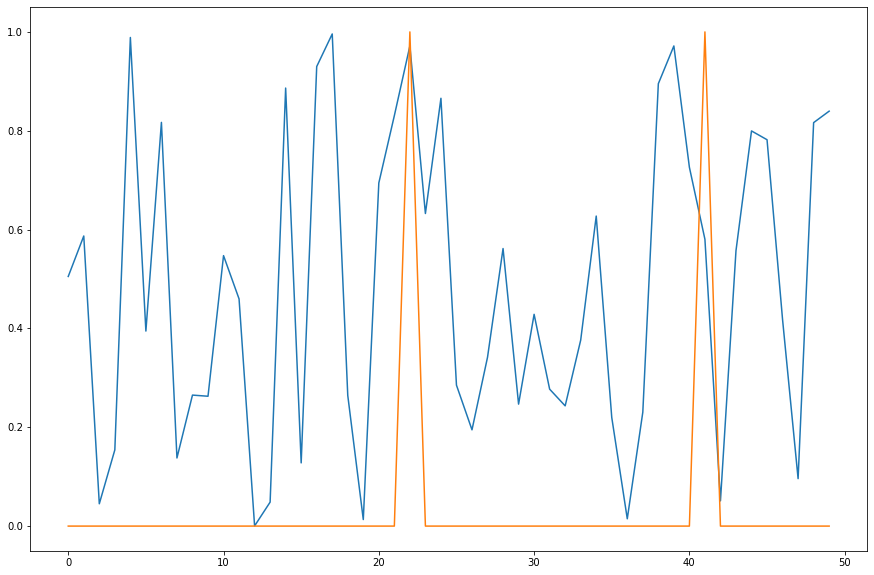

In [46]:
import numpy as np
n = np.random.randint(batch_size)
plt.figure(figsize=(15,10))
plt.plot(snn.spike_state['input'].detach().cpu().numpy()[:, n ,:])
plt.show()

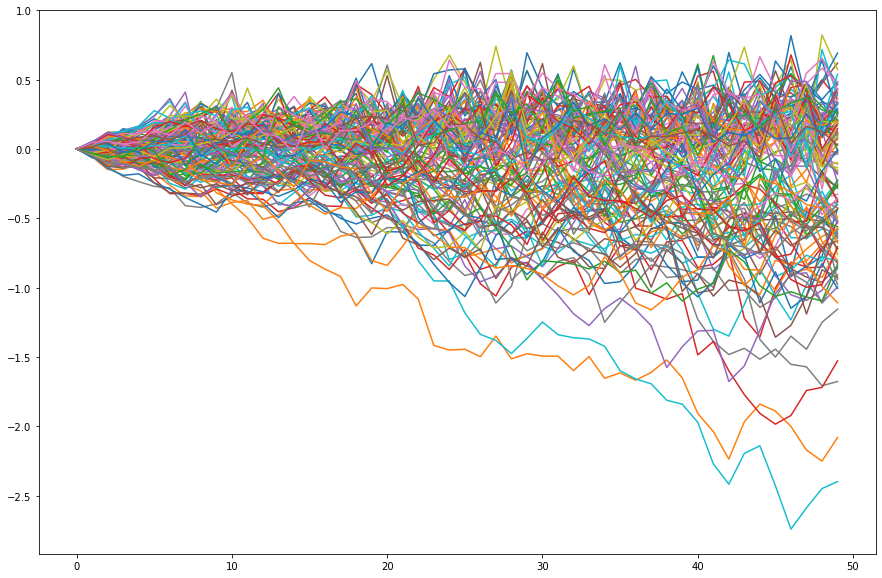

In [48]:
plt.figure(figsize=(15,10))
plt.plot(snn.mem_state['f1'].detach().cpu().numpy()[:, n ,:])
plt.show()

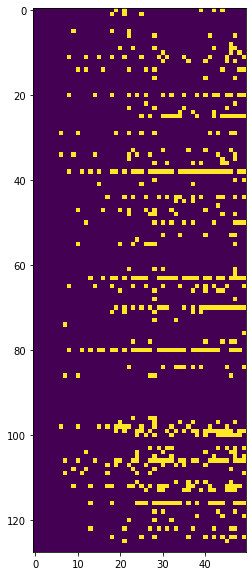

In [50]:
plt.figure(figsize=(15,10))
plt.imshow(snn.spike_state['f1'].T.detach().cpu().numpy()[:, n ,:])
plt.show()

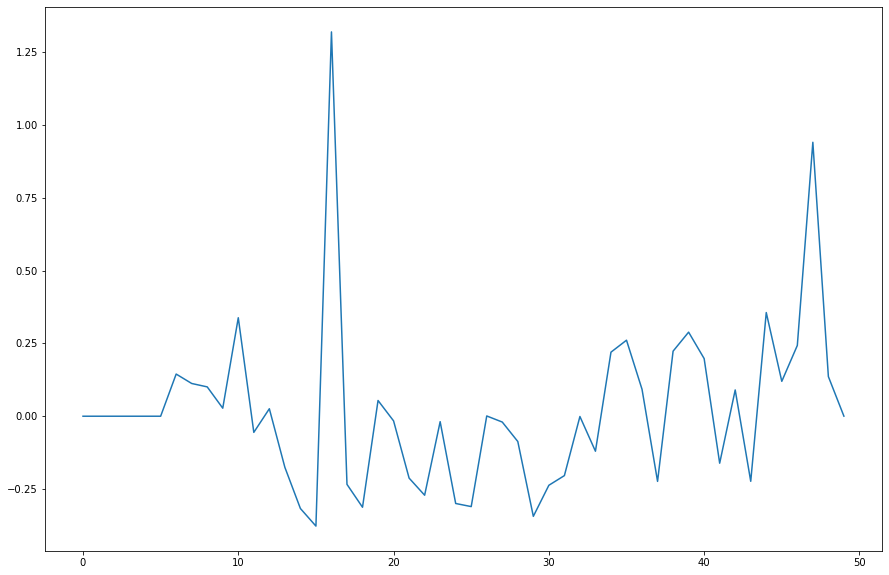

In [51]:
n = np.random.randint(batch_size)
plt.figure(figsize=(15,10))
plt.plot(snn.mem_state['output'].detach().cpu().numpy()[:, n ,:])
plt.show()

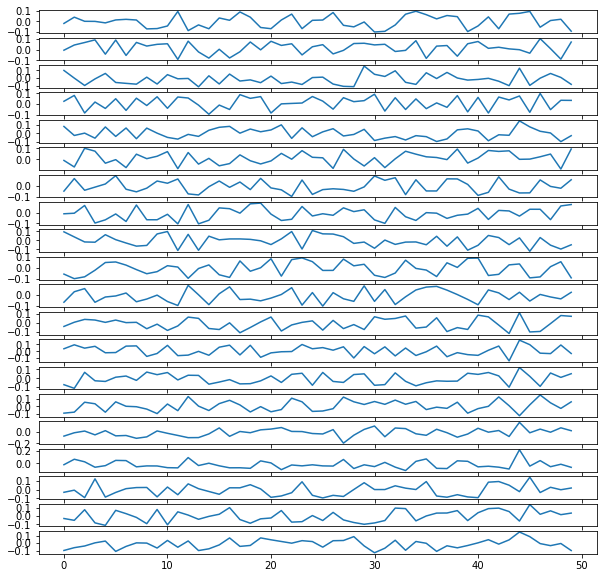

In [52]:
plt.figure(figsize=(10,10))
snn.plot_per_neuron_delays(snn.f0_i, n_cols=20, mode='synapse')

In [22]:
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
for images, labels in test_loader:
    break

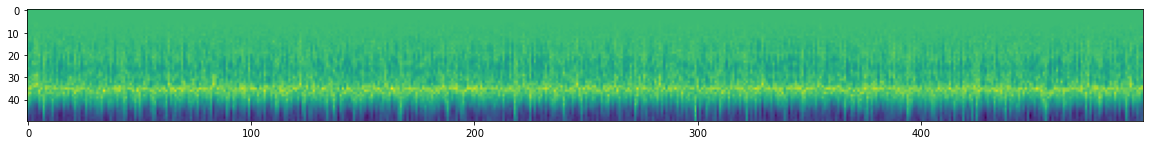

In [23]:
pred, ref = snn.propagate(images.to(device), labels.to(device))
import matplotlib.pyplot as plt
if hasattr(snn, 'mem_state'):
    plt.figure(figsize=(20,10))
    plt.imshow(snn.mem_state['output'][:,:,0].detach().cpu().numpy())
elif hasattr(snn, 'snn_state'):
    plt.figure(figsize=(10,10))
    plt.imshow(snn.snn_state['o_mem'][:,:,0].detach().cpu().numpy())

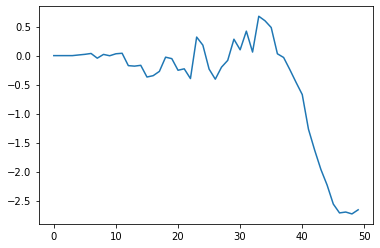

In [24]:
#plt.plot(snn.snn_state['o_mem'][:,2,0].detach().cpu().numpy())
plt.plot(snn.mem_state['output'][:,2,0].detach().cpu().numpy())

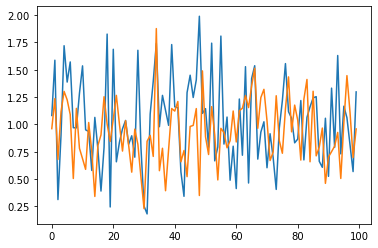

In [27]:
plt.plot(ref[:100].detach().cpu().numpy())
plt.plot(pred[:100].detach().cpu().numpy())

In [21]:
import torch
torch.sum(abs(pred-ref) < 0.04)

tensor(52, device='cuda:0')

In [91]:
snn.save_model('rsnn_d_all_2', ckpt_dir)